# Lading and cleaning the data

In [84]:
# load required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## Loading the survey raw data

In [85]:
data_raw=pd.read_excel("Прозорро_використання_даних _Відповіді_ext.xlsx")

The shape of the raw dataset:
{{data_raw.shape}}

This means that there are **{{data_raw.shape[0]}} responces** on **{{data_raw.shape[1]}} questions**.

Here are the **first** two responces:
{{data_raw.head(2)}}

Here are the **last** two responces:
{{data_raw.tail(2)}}

Here is the **list of questions**:

In [86]:
[quest for quest in data_raw.columns]

['Позначка часу',
 '0. Чи приймали ви участь в державних закупівлях до впровадження системи ProZorro?',
 '1. Скільки приблизно разів Ви приймали участь в закупівлях через систему ProZorro?',
 '2. Якими були основні причини Вашої участі в закупівлях через систему ProZorro?',
 '3. Яку доступну інформацію про закупівлі Ви використовуєте?',
 'Звідки Ви, в основному, отримуєте інформацію про закупівлі?',
 '4. Як використання інформації щодо закупівель вплинуло на діяльність Вашого підприємства?',
 '4. (Доповнення)',
 '5. Яка додаткова інформація щодо закупівель була би Вам корисна?',
 '6. Чи проводиться на Вашому підприємстві моніторинг даних про закупівлі?',
 'Якщо так, то чого саме стосується цей моніторинг?',
 "7. Чи було виділено на Вашому підприємстві працівника, до обов'язків якого належить збір та обробка даних з ProZorro?",
 '8. Чи використовуєте Ви в своїй діяльності річні плани закупівель, які публікуються замовниками?',
 '9. Чи плануєте Ви використовувати річні плани закупівель, 

## Cleaning and transforming the data

In [87]:
data=data_raw.fillna("")

For the start, we need to rename questions into workable variable names.

In [88]:
variables=\
{'Позначка часу': "time",
 '0. Чи приймали ви участь в державних закупівлях до впровадження системи ProZorro?':"old_syst",
 '1. Скільки приблизно разів Ви приймали участь в закупівлях через систему ProZorro?':"num_participations",
 '2. Якими були основні причини Вашої участі в закупівлях через систему ProZorro?':"partic_reasons",
 '3. Яку доступну інформацію про закупівлі Ви використовуєте?':"data_use",
 'Звідки Ви, в основному, отримуєте інформацію про закупівлі?':"data_source",
 '4. Як використання інформації щодо закупівель вплинуло на діяльність Вашого підприємства?':"data_effect",
 '4. (Доповнення)': "data_effect_ext",
 '5. Яка додаткова інформація щодо закупівель була би Вам корисна?':"demand_add_info",
 '6. Чи проводиться на Вашому підприємстві моніторинг даних про закупівлі?':"monitoring",
 'Якщо так, то чого саме стосується цей моніторинг?':"add_monitoring_target",
 "7. Чи було виділено на Вашому підприємстві працівника, до обов'язків якого належить збір та обробка даних з ProZorro?":"data_separ_pers",
 '8. Чи використовуєте Ви в своїй діяльності річні плани закупівель, які публікуються замовниками?':"annual_plans_use",
 '9. Чи плануєте Ви використовувати річні плани закупівель, якщо вони вони будуть "більшої якості" (точнішими, більш стабільними тощо)?':"annual_plans_use_future",
 '10. Чи використання даних щодо закупівель сприяло розширенню участі Вашого підприємства у закупівлях в  інших регіонах, секторах, організаціях?':"partic_reg_expant",
 '11. Чи використовується на Вашому підприємстві можливості доступу до питань/відповідей, вимог та скарг, які стосуються окремих лотів?':"claim_compl_use",
 '12. Чи проводите Ви моніторинг ставок, які роблять інші учасники, в т. ч.  Ваші конкуренти?':"competitors_monitoring",
 '13. Чи складають на Вашому підприємстві перелік організаторів закупівель, базуючись на даних ProZorro/Dozorro?':"list_proc_ent",
 '14. Чи використовуєте Ви коментарі, які залишають на порталі Dozorro?':"comments_dozorro_use",
 "15. Ваша електроння адреса (необов'язково): ":"e_mail",
 'Тут Ви можете надати додаткові коментарі, які стосуються роботи з даними:':"final_comments"
}

variables=pd.DataFrame(data=list(variables.values()), index=list(variables.keys()), columns=["new_name"])
data.columns=list(variables["new_name"])

Here is the table with old and new names:
{{variables}}

After the renaming, the **first** two responces look as follows:

{{data.head(2)}}


In [89]:
# time transformation into appropriate format


# old_syst transformation into dummy
data["old_syst"]=pd.get_dummies(data["old_syst"]).iloc[:, [1]]

# Results

Here are the main results of the survey are presented. The order of sections is the same as the order of questions in then survey.

In [90]:
# function for cleaning the responces

def answer_cleaning(series, answers_possible):
    """
    The function takes the column of raw answers (Series) and
    vector of possible (predefined) answers and replaces any other responces
    by word "other".
    """
    answers_clean=[]
    for i in range(len(series)):
        cell_raw=series[i]
        cell_clean=""
        if cell_raw!="":
            for answer in answers_possible:
                if answer in cell_raw:
                    cell_clean+=answer+", "
                    cell_raw=cell_raw.replace(answer, "")
            cell_raw=cell_raw.replace(" ", "").replace(",", "")
            if cell_raw!="":
                cell_clean+="other"
            answers_clean.append(cell_clean)
    return answers_clean

# function for summary table on responces ("experienced" companies and "newcomers")

def table_answer_summary(data, column):
    data_answ_summary=pd.DataFrame(data[column].str.split(', ', expand=True).apply(pd.value_counts).sum(axis=1))#.reset_index()
    data_answ_summary["num_ment_old"]=pd.DataFrame(data[column][data["old_syst"]==1].str.split(', ', expand=True).apply(pd.value_counts).sum(axis=1))
    data_answ_summary["num_ment_new"]=pd.DataFrame(data[column][data["old_syst"]==0].str.split(', ', expand=True).apply(pd.value_counts).sum(axis=1))

    data_answ_summary=data_answ_summary.reset_index()
    data_answ_summary.columns=[column, "num_ment_all", "num_ment_old", "num_ment_new"]

    data_answ_summary["num_ment_all_perc"]=100*data_answ_summary["num_ment_all"]/len(data["old_syst"])
    data_answ_summary["num_ment_old_perc"]=100*data_answ_summary["num_ment_old"]/sum(data["old_syst"])
    data_answ_summary["num_ment_new_perc"]=100*data_answ_summary["num_ment_new"]/(len(data["old_syst"])-sum(data["old_syst"]))

    data_answ_summary=data_answ_summary[data_answ_summary[column]!=""].sort_values("num_ment_all", axis=0, ascending=False).reset_index(drop=True)
    return data_answ_summary


# function for figure on responces ("experienced" companies and "newcomers")

def figure_distr_answ_old_new(data_answer_distr):
    """
    The function takes prepared dataframe that consists of summarised statistics on responces,
    and constructs the figure with distribution of answers by the type of companies ("experienced" and "newcomer"). 
    Where the "experienced" means that the company participated into tenders conducted through precvious system,
    and "newcomer" - didn't.
    """
    figure=plt.figure(figsize=(18, 4))
    
    ### subplot 1
    ax_0=figure.add_subplot(131)
    
    ax_0.bar(np.arange(len(data_answer_distr)), list(data_answer_distr["num_ment_all"]))
    
    ax_0.set_title("a) Absolute distribution")
    ax_0.set_ylabel('# of companies')
    ax_0.set_xlabel('responces')
    ax_0.set_xticks(np.arange(len(data_answer_distr)))# + width / 2)  
    ax_0.set_xticklabels(list(data_answer_distr[data_answer_distr.columns[0]]), rotation='vertical')
 
    
    ### subplot_2
    ax_1 = figure.add_subplot(132)

    width = 0.35       # the width of the bars
    rects1 = ax_1.bar(np.arange(len(data_answer_distr)), list(data_answer_distr["num_ment_old"]), width, color='#3182bd')
    rects2 = ax_1.bar(np.arange(len(data_answer_distr)) + width, list(data_answer_distr["num_ment_new"]), width, color='gray') #0.35 - width

    # add some text for labels, title and axes ticks
    ax_1.set_title('b) Absolute distribution by group')
    ax_1.set_ylabel('# of companies')
    ax_1.set_xlabel('responces')
    ax_1.set_xticks(np.arange(len(data_answer_distr)) + width / 2)
    ax_1.set_xticklabels(list(data_answer_distr[data_answer_distr.columns[0]]), rotation='vertical')

    ax_1.legend((rects1[0], rects2[0]), ('old', 'newcomers'))


    ### subplot_3
    ax_2 = figure.add_subplot(133)

    width = 0.35       # the width of the bars
    rects1 = ax_2.bar(np.arange(len(data_answer_distr)), list(data_answer_distr["num_ment_old_perc"]), width, color='#3182bd')
    rects2 = ax_2.bar(np.arange(len(data_answer_distr)) + width, list(data_answer_distr["num_ment_new_perc"]), width, color='gray') #0.35 - width

    # add some text for labels, title and axes ticks
    ax_2.set_title('c) Relative distribution by group')
    ax_2.set_ylabel('% of companies')
    ax_2.set_xlabel('responces')
    ax_2.set_xticks(np.arange(len(data_answer_distr)) + width / 2)
    ax_2.set_xticklabels(list(data_answer_distr[data_answer_distr.columns[0]]), rotation='vertical')

    ax_2.legend((rects1[0], rects2[0]), ('old', 'newcomers'))

    return figure

## Did You participate in tenders conducted under the previous system?

**UKR: 0. Чи приймали ви участь в державних закупівлях до впровадження системи ProZorro?**

In [91]:
old_partic=pd.DataFrame(list(data["old_syst"].value_counts()), index=["yes", "no"], columns=["partic_old_syst"])
old_partic["share"]=100*old_partic["partic_old_syst"]/sum(old_partic["partic_old_syst"])

**More than {{round(old_partic.loc["no", "share"], 1)}}% of companies are newcomers** (i.e, didn't participate into public procurements conducted under the previous system).

{{old_partic}}


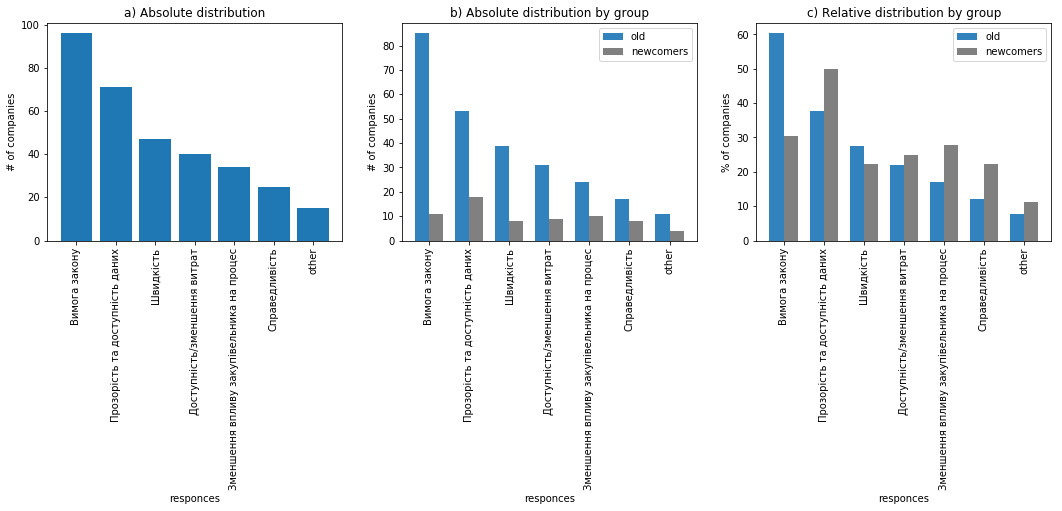

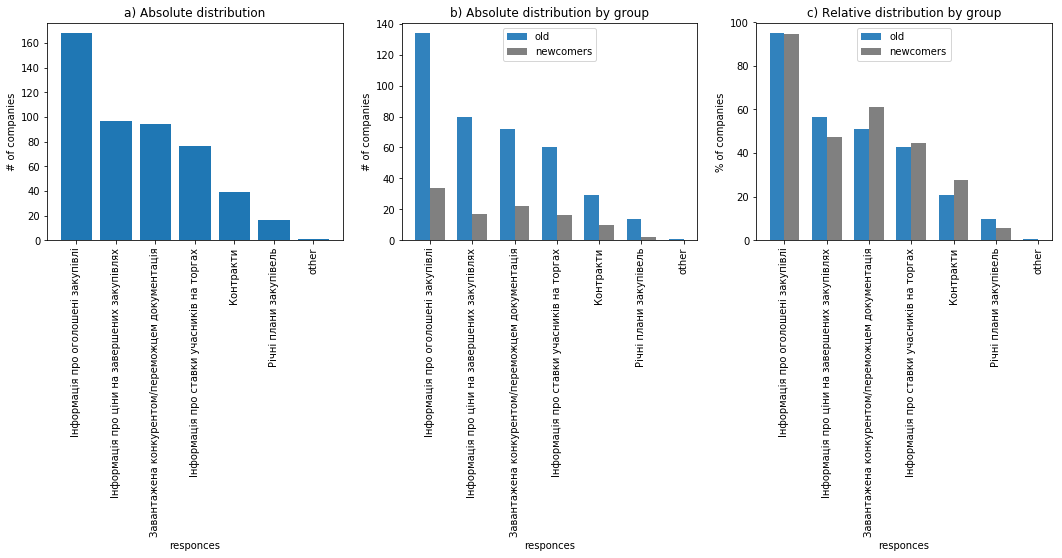

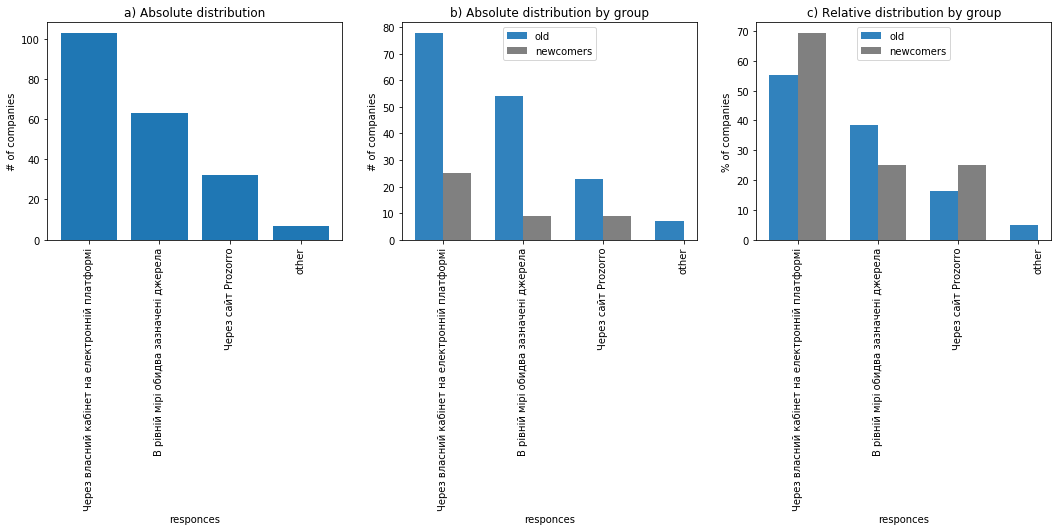

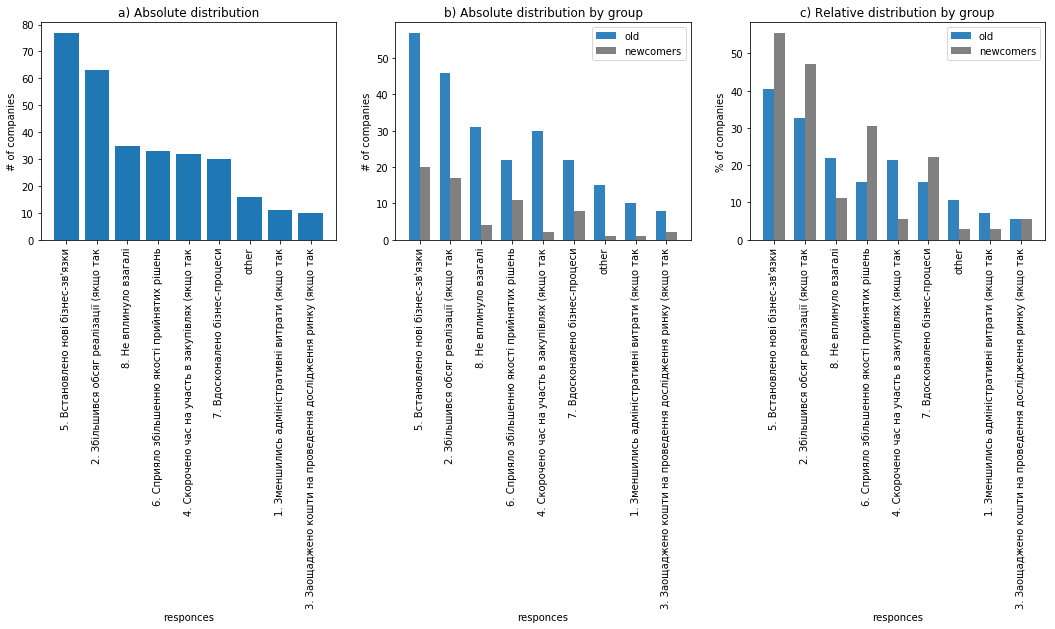

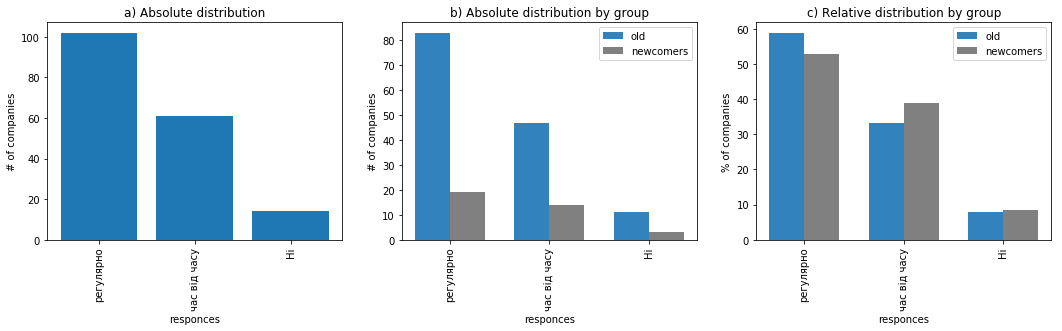

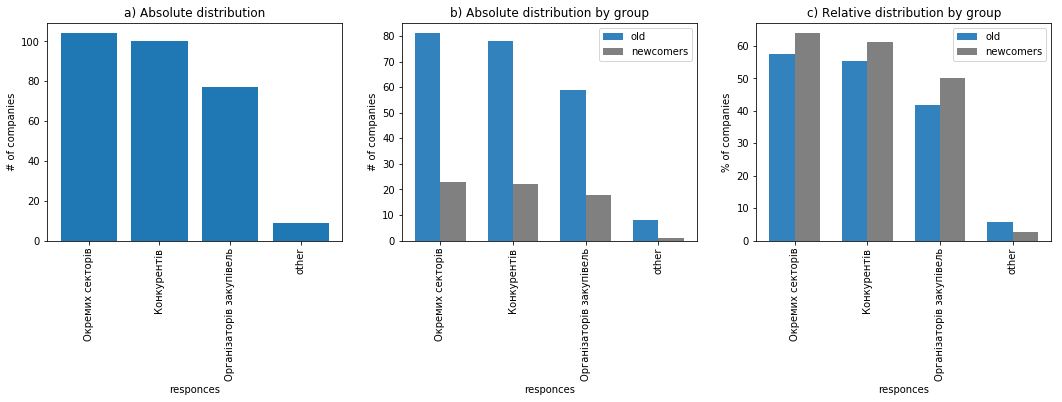

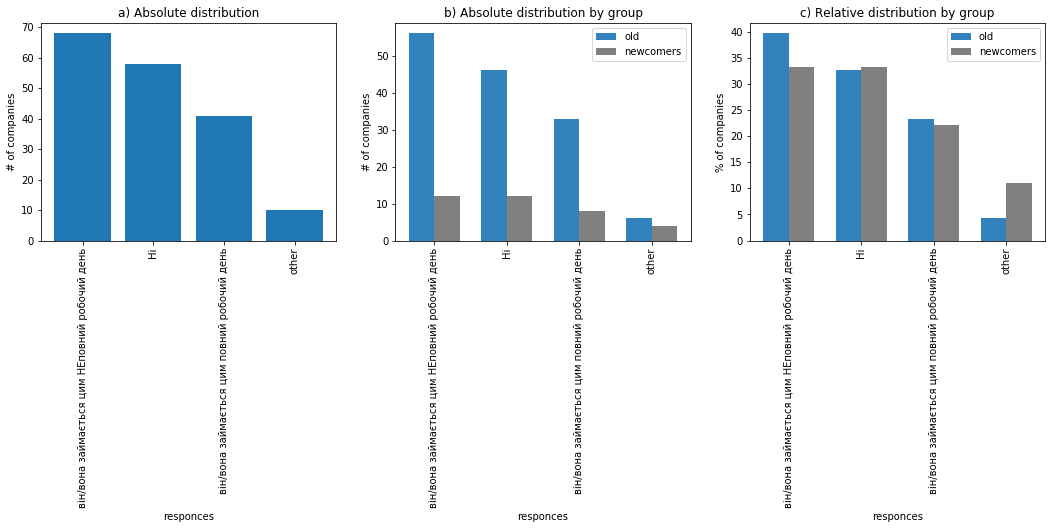

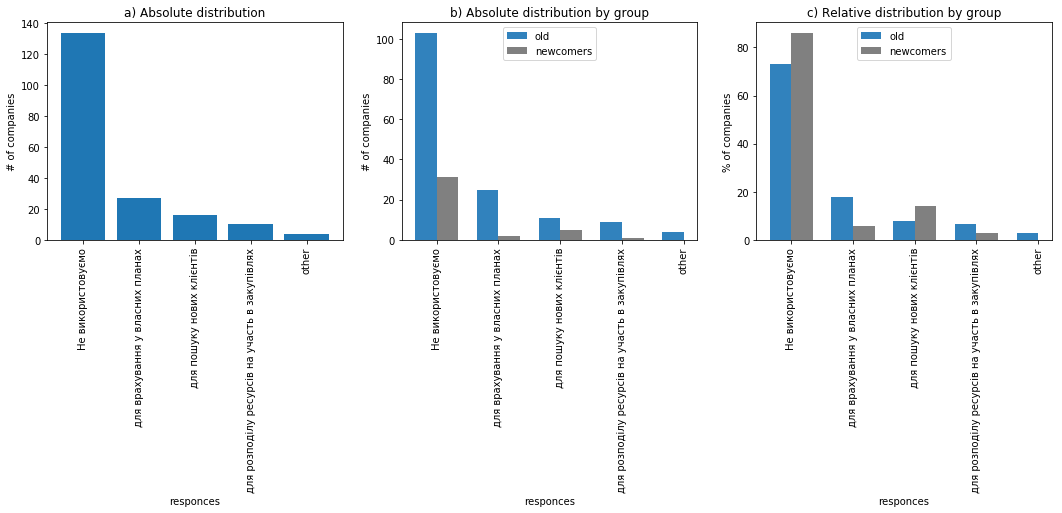

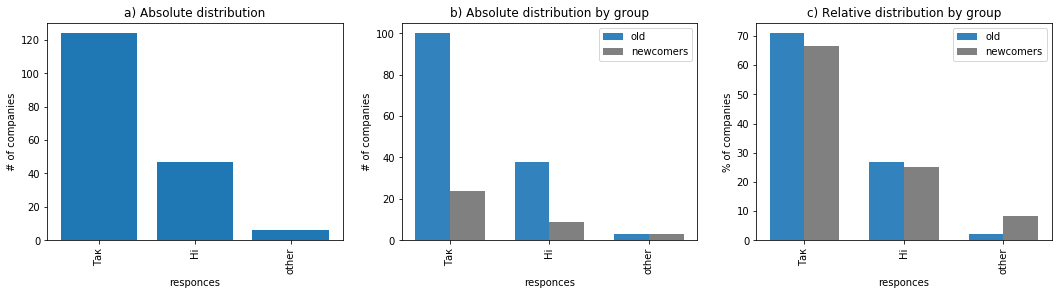

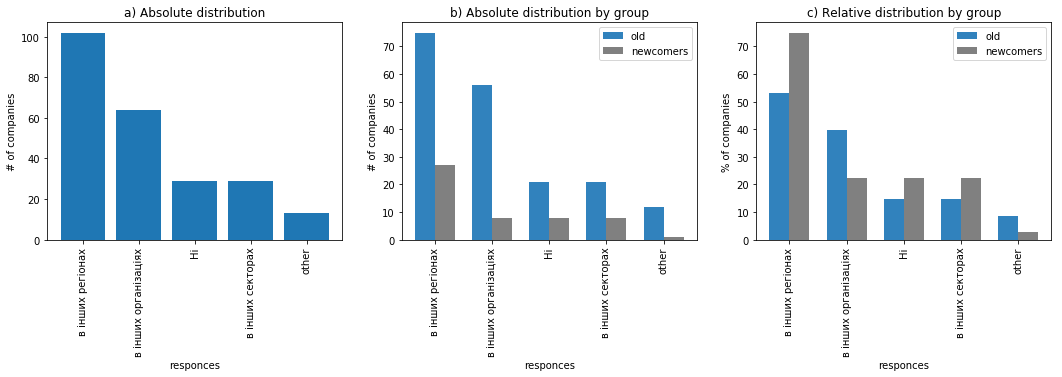

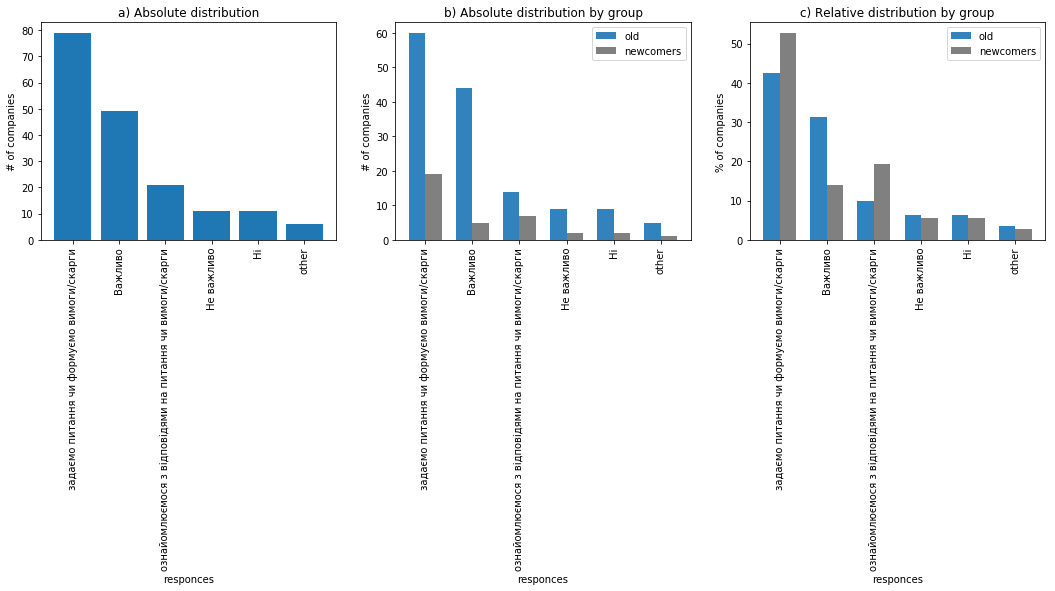

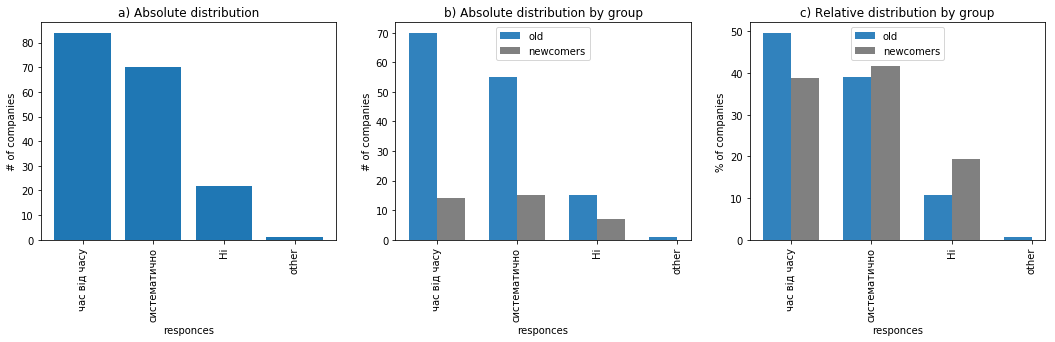

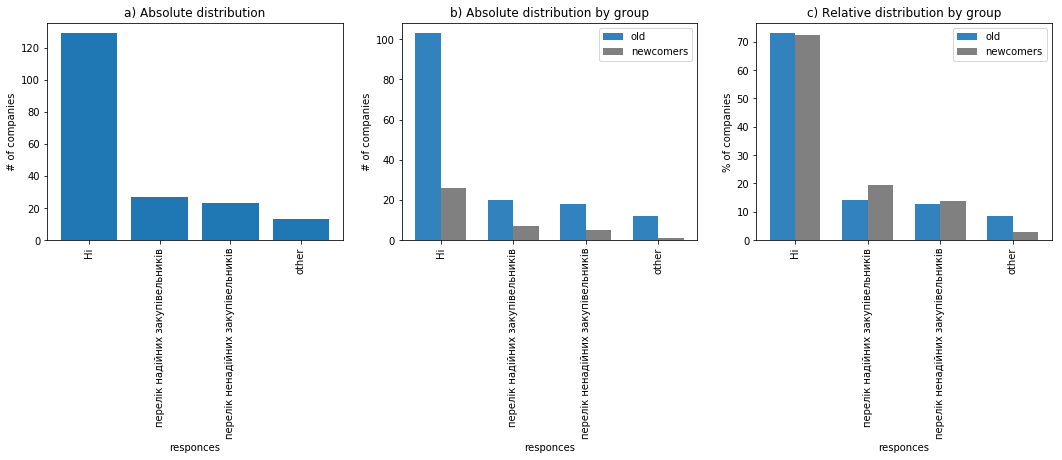

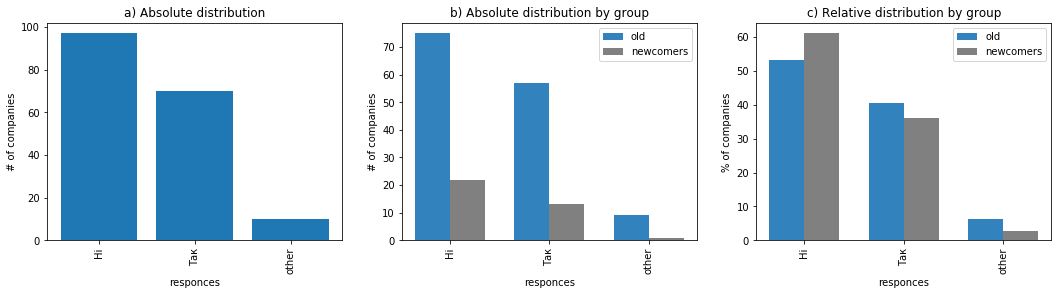

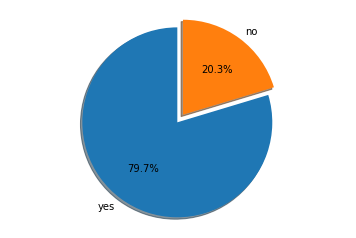

In [92]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()

ax1.pie(old_partic["partic_old_syst"], explode=[0, 0.1], labels=old_partic.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## How many times did You participate in tenders conducted through the Prozorro?

**UKR: 1. Скільки приблизно разів Ви приймали участь в закупівлях через систему ProZorro?**

In [93]:
# participated into old system
q_2=pd.DataFrame(pd.cut(data["num_participations"][data["old_syst"]==1], 
                            [0, 1, 25, 50, 75, 100,1000000], 
                            right=False).value_counts(sort=False))
q_2.columns=["partic_old_syst"]
q_2["partic_old_syst_perc"]=100*q_2["partic_old_syst"]/sum(q_2["partic_old_syst"])

# didn't participate into old system
q_2["partic_old_syst_not"]=pd.DataFrame(pd.cut(data["num_participations"][data["old_syst"]==0], 
                            [0, 1, 25, 50, 75, 100,1000000], 
                            right=False).value_counts(sort=False))
q_2["partic_old_syst_not_perc"]=100*q_2["partic_old_syst_not"]/sum(q_2["partic_old_syst_not"])

# all
q_2["all"]=q_2["partic_old_syst"]+q_2["partic_old_syst_not"]
q_2["all_perc"]=100*q_2["all"]/sum(q_2["all"])

#Note: here 0 means "many" (when respondent didn't provide the exact or approximate number)
q_2.index=["many", "1-24", "25-49", "50-74", "75-99", "100+"] 

Here is the table with distribution of answers:
{{q_2}}

Here is the distribution of companies by the number of their participations:

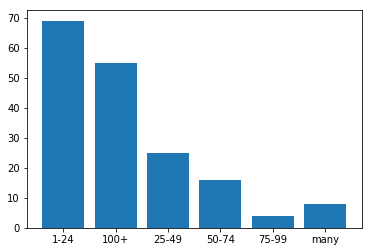

In [94]:
plt.bar(list(q_2.index.astype(str)), list(q_2["all"]))
plt.show()

Here is the distribution of companies by the number of their participations and "experience":

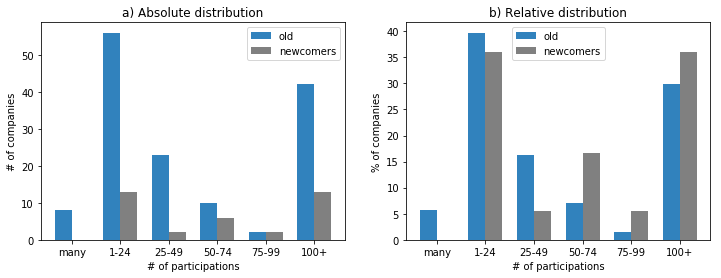

In [95]:
figure_q_2=plt.figure(figsize=(12, 4))

### subplot_1
ax_1 = figure_q_2.add_subplot(121)

width = 0.35       # the width of the bars
rects1 = ax_1.bar(np.arange(len(q_2)), list(q_2["partic_old_syst"]), width, color='#3182bd')
rects2 = ax_1.bar(np.arange(len(q_2)) + width, list(q_2["partic_old_syst_not"]), width, color='gray') #0.35 - width

# add some text for labels, title and axes ticks
ax_1.set_title('a) Absolute distribution')
ax_1.set_ylabel('# of companies')
ax_1.set_xlabel('# of participations')
ax_1.set_xticks(np.arange(len(q_2)) + width / 2)
ax_1.set_xticklabels(list(q_2.index))
ax_1.legend((rects1[0], rects2[0]), ('old', 'newcomers'))


### subplot_2
ax_2 = figure_q_2.add_subplot(122)

width = 0.35       # the width of the bars
rects1 = ax_2.bar(np.arange(len(q_2)), list(q_2["partic_old_syst_perc"]), width, color='#3182bd')
rects2 = ax_2.bar(np.arange(len(q_2)) + width, list(q_2["partic_old_syst_not_perc"]), width, color='gray') #0.35 - width

# add some text for labels, title and axes ticks
ax_2.set_title('b) Relative distribution')
ax_2.set_ylabel('% of companies')
ax_2.set_xlabel('# of participations')
ax_2.set_xticks(np.arange(len(q_2)) + width / 2)
ax_2.set_xticklabels(list(q_2.index))
ax_2.legend((rects1[0], rects2[0]), ('old', 'newcomers'))

plt.show()

According to the survey results, the companies that also participated into previous system, on average, participate more in tender conducted through Prozorro:

In [96]:
q_2_ave=pd.DataFrame(data["num_participations"][data["num_participations"]<9999].groupby(data['old_syst']).mean())

Here is the table with the average number of participations into Prozorro tenders for "experienced" companies and "newcomers":

{{q_2_ave}}

(*For this analysis we excluded one observation because of probable mistake - one respondent mentioned the number of participations equal to 10000)

As it can be seen from the table, the average number of participations into Prozorro tenders for more experienced companies (participated into previous procurement system) is **{{round(q_2_ave.loc[1, "num_participations"], 1)}}**, while for newcomers this number s slightly lower **{{round(q_2_ave.loc[0, "num_participations"], 1)}}**.
But, in order to check where the difference is statistically significant, t-test is needed:

In [97]:
from scipy.stats import ttest_ind
ttest_ind(data["num_participations"][data['old_syst']==0][data["num_participations"]<9999], 
          data["num_participations"][data['old_syst']==1][data["num_participations"]<9999])

Ttest_indResult(statistic=-0.28406375294511294, pvalue=0.77669927201210731)

Based on the t-test results, we can't claim that the average number of participations among "experienced" companies is statistically different from the "newcomers'" one.

**CONCLUSION: The fact that the average number of participations for "newcomers" is statistically equal to the average number of participations for "experienced" companies can be explained by the *low entry barrier in Prozorro tenders***

## What were the main reasons behind Your participation in tenders conducted through the Prozorro?

**UKR: 2. Якими були основні причини Вашої участі в закупівлях через систему ProZorro?**

In [98]:
#some cleaning
answers_possible_q_3=["Вимога закону", "Зменшення впливу закупівельника на процес", "Прозорість та доступність даних", 
         "Справедливість", "Доступність/зменшення витрат", "Швидкість"]
data["partic_reasons"]=answer_cleaning(data["partic_reasons"], answers_possible_q_3)

# create the distribution table
q_3=table_answer_summary(data, "partic_reasons")

Here is the table with the main **reasons for participation** in Prozorro system:

{{q_3}}

Here is the Figure based on the table above:

{{figure_distr_answ_old_new(q_3)}}

Putting aside the mention requirement of the law, the main reason behind the participation into Prozorro auction is **{{q_3.loc[q_3["num_ment_new"].idxmax(), "partic_reasons"]}}**.

It is also interesting to check whether there is the difference between the "experienced" companies and "newcomers" regarding the reasons behind their participation in Prozorro auctions. 

As it can be seen from the figure above, there is difference in reasons behind the participation between "experienced" companies and "newcomers":
- The main reason for "experienced" companies is **{{q_3.loc[q_3["num_ment_old"].idxmax(),"partic_reasons"]}}**.

- The main reason for "newcomers" is **{{q_3.loc[q_3["num_ment_new"].idxmax(),"partic_reasons"]}}**.
- Other reasons are more or less equally distributed among two groups of companies.

## What types of information on public procurements do You use? 

**UKR: 3. Яку доступну інформацію про закупівлі Ви використовуєте?**

In [99]:
#some cleaning
answers_possible_q_4=["Річні плани закупівель", "Інформація про оголошені закупівлі", "Інформація про ставки учасників на торгах", 
         "Завантажена конкурентом/переможцем документація", "Інформація про ціни на завершених закупівлях", "Контракти"]
data["data_use"]=answer_cleaning(data["data_use"], answers_possible_q_4)

# create the distribution table
q_4=table_answer_summary(data, "data_use")

Here is the table with the main **types of information** used:

{{q_4}}

It is also interesting to check whether there is the difference between the "experienced" companies and "newcomers" regarding the data on procurements they use. 

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_4)}}


## What are the main sources of information You use?

**UKR: Звідки Ви, в основному, отримуєте інформацію про закупівлі?**

In [100]:
#some cleaning
answers_possible_q_5=["Через власний кабінет на електронній платформі", "Через сайт Prozorro", "В рівній мірі обидва зазначені джерела"]
data["data_source"]=answer_cleaning(data["data_source"], answers_possible_q_5)

# create the distribution table
q_5=table_answer_summary(data, "data_source")

Here is the table with the main **sources of information** used:

{{q_5}}

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_5)}}

## What is the impact of the data You use? (FINISH LATER)

**UKR: 4. Як використання інформації щодо закупівель вплинуло на діяльність Вашого підприємства?**

In [101]:
#some cleaning
data["data_effect"]=data["data_effect"].apply(str)
answers_possible_q_6=['1. Зменшились адміністративні витрати (якщо так, то в полі "Інше" зазначте 1: на скільки у %)', 
                      '2. Збільшився обсяг реалізації (якщо так, то в полі "Інше" зазначте 2: на скільки у %)', 
                      '3. Заощаджено кошти на проведення дослідження ринку (якщо так, то в полі "Інше" зазначте 3: на скільки у %)',
                      '4. Скорочено час на участь в закупівлях (якщо так, то в полі "Інше" зазначте 4: на скільки у %)',
                      "5. Встановлено нові бізнес-зв'язки",
                      '6. Сприяло збільшенню якості прийнятих рішень',
                      '7. Вдосконалено бізнес-процеси',
                      '8. Не вплинуло взагалі']
data["data_effect"]=answer_cleaning(data["data_effect"], answers_possible_q_6)

# create the distribution table
q_6=table_answer_summary(data, "data_effect")

# additional filter
q_6=q_6[["то в полі" not in effect for effect in q_6["data_effect"]]].reset_index(drop=True)

Here is the table with the main **sources of information** used:

{{q_6}}

**NOTE! There is huge difference between types of companies regarding the data impact. Out of 35 companies that are not affected by data use, 31 of them are experienced companies**. 

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_6)}}

**ADDITIONAL INFORMATION**

Here are the answers on the **size of the effect**:

{{pd.DataFrame(data["data_effect_ext"].drop_duplicates())}}

In [102]:
data_effect_size = pd.DataFrame(data["data_effect_ext"]
                                [data["data_effect_ext"].str[0].isin(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])])
data_effect_size = data_effect_size["data_effect_ext"].str.split(", ", expand=True)
data_effect_size=pd.DataFrame(data_effect_size[0].append(data_effect_size[1])
                                     .append(data_effect_size[2])
                                     .dropna())
data_effect_size["question"] = data_effect_size[0].str[0].apply(int)
data_effect_size["answer"] = data_effect_size[0].str.split(": ").str[1]


data_effect_size_dict = {}
for i in range(1, 5):
    data_temp = data_effect_size[data_effect_size["question"]==i]
    data_effect_size_dict[i]=list(data_temp["answer"])

data_effect_size_distr = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data_effect_size_dict.items() ])).fillna("")

Here is the distribution of answers on **size of the effect** by question:

{{data_effect_size_distr}}

## Which additional information on procurements You need?

**UKR: 5. Яка додаткова інформація щодо закупівель була би Вам корисна?**

Here are the respondents' **demand for additional information**:

In [103]:
[info for info in data["demand_add_info"] if info!=""]

['Информации вполне достаточно',
 '-',
 'никакая',
 'Інформації достатньо, бажано змінити форму надання інформації',
 'Більш чітка та компетентна тендерна документація замовників.',
 'ВСЯ ІНФОРМАЦІЯ МЕНЕ ВЛАШТОВУЄ',
 'архив',
 'Дані замовника про кількість оголошених замовлень та підписаних договорів із виконавцем. Своєрідний рейтинг замовмика',
 'хватает той, что есть',
 '-',
 'плани замовників',
 'Вся потрібна  інформація є в наявності',
 'Інформації досить.',
 'Аналіз в розрізі предмету закупівлі та постачальника',
 'інформації достатньо, корупції багато',
 'не потрібно , все і так зрозуміло',
 'інформація щодо звернень про порушення в ході закупівлі в профільні міністерства,  антикорупційні відділи',
 'Технічні умови',
 'не можу відповісти',
 'Статистика покараних, і притягнутих до відповідальності замовників за недотримання законів, правил ProZorro. Чорний список замовників та учасників.',
 'все влаштовує',
 'Сиатистика',
 'Список всіх скарг, що були висунуті замовнику за попердні

## Which additional information on procurements You need?

**UKR: 6. Чи проводиться на Вашому підприємстві моніторинг даних про закупівлі?**

   **Якщо так, то чого саме стосується цей моніторинг?**

In [104]:
# some cleaning (first part)
answers_possible_q_8_1=["Так, регулярно",
                        "Так, час від часу", 
                        "Ні"]
data["monitoring"]=answer_cleaning(data["monitoring"], answers_possible_q_8_1)

# create the distribution table (first part)
q_8_1=table_answer_summary(data, "monitoring")
q_8_1=q_8_1.drop(q_8_1.index[0]).reset_index(drop=True)

#some cleaning (second part)
data["add_monitoring_target"]=data["add_monitoring_target"].astype(str)
answers_possible_q_8_2=["Окремих секторів", 
                        "Конкурентів", 
                        "Організаторів закупівель"]
data["add_monitoring_target"]=answer_cleaning(data["add_monitoring_target"], answers_possible_q_8_2)

# create the distribution table (second part)
q_8_2=table_answer_summary(data, "add_monitoring_target")


Here is the table with data on **monitoring frequency**:

{{q_8_1}}

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_8_1)}}

Here is the table with data on **monitoring target**:

{{q_8_2}}

**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_8_2)}}

## Do You have separate person that collects and processes data on procurements?

**UKR: 7. Чи було виділено на Вашому підприємстві працівника, до обов'язків якого належить збір та обробка даних з ProZorro?**

In [105]:
#some cleaning
answers_possible_q_9=["Так, він/вона займається цим повний робочий день", 
                      "Так, він/вона займається цим НЕповний робочий день", 
                      "Ні"]
data["data_separ_pers"]=answer_cleaning(data["data_separ_pers"], answers_possible_q_9)

# create the distribution table
q_9=table_answer_summary(data, "data_separ_pers")
q_9=q_9.drop(q_9.index[0]).reset_index(drop=True)

Here is the table with data on **separate data person**:

{{q_9}}

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_9)}}

## Do You use procurement entities' annual procurement plans?

**UKR: 8. Чи використовуєте Ви в своїй діяльності річні плани закупівель, які публікуються замовниками?**

In [106]:
#some cleaning
answers_possible_q_10=["Так, для пошуку нових клієнтів", 
                      "Так, для розподілу ресурсів на участь в закупівлях", 
                      "Так, для врахування у власних планах",
                      "Не використовуємо"]
data["annual_plans_use"]=answer_cleaning(data["annual_plans_use"], answers_possible_q_10)

# create the distribution table
q_10=table_answer_summary(data, "annual_plans_use")
q_10=q_10.drop(q_10.index[1]).reset_index(drop=True)
#q_10=q_10.drop(q_10[q_10.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **annual plans use**:

{{q_10}}

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_10)}}

## Are You going to use procurement entities' annual procurement plans if the will have higher quality?

**UKR: 9. Чи плануєте Ви використовувати річні плани закупівель, якщо вони вони будуть "більшої якості" (точнішими, більш стабільними тощо)?**

In [107]:
#some cleaning
answers_possible_q_11=["Так", 
                      "Ні"]
data["annual_plans_use_future"]=answer_cleaning(data["annual_plans_use_future"], answers_possible_q_11)

# create the distribution table
q_11=table_answer_summary(data, "annual_plans_use_future")

Here is the table with data on **annual plans use in the future**:

{{q_11}}

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_11)}}

## Is You activity expanded on other regions, sectors or entities because of data use?

**UKR: 10. Чи використання даних щодо закупівель сприяло розширенню участі Вашого підприємства у закупівлях в  інших регіонах, секторах, організаціях?**

In [108]:
#some cleaning
answers_possible_q_12=["Так, в інших регіонах", 
                      "Так, в інших секторах",
                      "Так, в інших організаціях",
                      "Ні"]
data["partic_reg_expant"]=answer_cleaning(data["partic_reg_expant"], answers_possible_q_12)

# create the distribution table
q_12=table_answer_summary(data, "partic_reg_expant")
q_12=q_12.drop(q_12.index[0]).reset_index(drop=True)
#q_12=q_12.drop(q_12[q_12.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **activity's expansion**:

{{q_12}}

**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_12)}}

## Do You use such instruments as questions, claims and complaints?

**UKR: 11. Чи використовується на Вашому підприємстві можливості доступу до питань/відповідей, вимог та скарг, які стосуються окремих лотів?**

In [109]:
#some cleaning
answers_possible_q_13=["Так, задаємо питання чи формуємо вимоги/скарги", 
                       "Так, ознайомлюємося з відповідями на питання чи вимоги/скарги, залишеними іншими учасниками",
                       "Важливо",
                       "Не важливо",
                       "Ні"]
data["claim_compl_use"]=answer_cleaning(data["claim_compl_use"], answers_possible_q_13)

# create the distribution table
q_13=table_answer_summary(data, "claim_compl_use")
q_13=q_13.drop(q_13.index[0]).reset_index(drop=True)
q_13=q_13.drop(q_13.index[2]).reset_index(drop=True)
#q_13=q_13.drop(q_13[q_13.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **using questions, claims, complaints**:

{{q_13}}

**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_13)}}

## Do You monitor other companies' bids?

**UKR: 12. Чи проводите Ви моніторинг ставок, які роблять інші учасники, в т. ч.  Ваші конкуренти?**

In [110]:
#some cleaning
answers_possible_q_14=["Так, систематично", 
                       "Так, час від часу",
                       "Ні"]
data["competitors_monitoring"]=answer_cleaning(data["competitors_monitoring"], answers_possible_q_14)

# create the distribution table
q_14=table_answer_summary(data, "competitors_monitoring")
q_14=q_14.drop(q_14.index[0]).reset_index(drop=True)
#q_14=q_14.drop(q_14[q_14.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **monitoring of other companies**:

{{q_14}}

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_14)}}

## Do You prepare "black" or "white" lists of procurement entities?

**UKR: 13. Чи складають на Вашому підприємстві перелік організаторів закупівель, базуючись на даних ProZorro/Dozorro?**

In [111]:
#some cleaning
answers_possible_q_15=["Так, перелік ненадійних закупівельників", 
                       "Так, перелік надійних закупівельників",
                       "Ні"]
data["list_proc_ent"]=answer_cleaning(data["list_proc_ent"], answers_possible_q_15)

# create the distribution table
q_15=table_answer_summary(data, "list_proc_ent")
q_15=q_15.drop(q_15.index[1]).reset_index(drop=True)


Here is the table with data on **monitoring of other companies**:

{{q_15}}

**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_15)}}

## Do You use comments left on Dozorro?

**UKR: 14. Чи використовуєте Ви коментарі, які залишають на порталі Dozorro?**

In [112]:
#some cleaning
answers_possible_q_16=["Так",
                       "Ні"]
data["comments_dozorro_use"]=answer_cleaning(data["comments_dozorro_use"], answers_possible_q_16)

# create the distribution table
q_16=table_answer_summary(data, "comments_dozorro_use")
#q_16=q_16.drop(q_16.index[0]).reset_index(drop=True)


Here is the table with data on **monitoring of other companies**:

{{q_16}}

**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

{{figure_distr_answ_old_new(q_16)}}

## Final comments

Here are the respondents' **final comments**:

In [113]:
[comment for comment in data["final_comments"] if comment!=""]

['Единственный плюс электронных площадок, это небольшое сокращение времени на участие. ',
 'Основні недоліки:    1. Не ефективна процедура проведення аукціону "Прозоро";     2. Диктат замовників та безправність учасників закупівлі.   ',
 'за допомогою Прозорррро Україну завалять мотлохом, низкопробними товарами... Ми на це з жахом дивимось вже рік! Якість шкільного обладнання впала на дно. Наслідки будуть дорого коштувати',
 'Прозоро, не завжди прозоро',
 'Основним викликом при закупівлі фармацевтичної продукції - є  штучні обмеження кількості учасників. Це досягається: об"єднання декількох лікарських засобів в 1 лот, додаткові технічні умови (наявність відгуку про використання від конкретної лікарні, закупівля ліків лише в формі ампул - пропозицію в флаконах буде відхидено, тощо).',
 'очень часто заказчик чтобы протянуть своего исполнителя абсолютно необосновано дисквалифицируют победителей. невзирая на очень существенную разницу в цене .требуют множество дублирующих документов и спра